In [1]:
from skimage.io import imread
from skimage.io import imsave
from skimage import filters
from skimage import morphology
from pyclesperanto_prototype import imshow
import pyclesperanto_prototype as cle
import matplotlib.pyplot as plt

In [2]:
import napari
from napari.utils import nbscreenshot

In [3]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from skimage import measure
import os
os.getcwd()

'/groups/tanaka/People/current/jiwang/projects/RA_competence/scripts'

In [4]:
def show(image_to_show, labels=False):
    """
    This function generates three projections: in X-, Y- and Z-direction and shows them.
    """
    projection_x = cle.maximum_x_projection(image_to_show)
    projection_y = cle.maximum_y_projection(image_to_show)
    projection_z = cle.maximum_z_projection(image_to_show)

    fig, axs = plt.subplots(1, 3, figsize=(15, 15))
    cle.imshow(projection_x, plot=axs[0], labels=labels)
    cle.imshow(projection_y, plot=axs[1], labels=labels)
    cle.imshow(projection_z, plot=axs[2], labels=labels)
    plt.show()


In [5]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

In [6]:
############################################################
###
### FoxA2-KO Pax6-KO d3, d4, d6  
### quantifying the FoxA2-KO and Pax6-KO genotypes and the FoxA2 and Pax6 voxels based on the masked and cyst-level background 
###
############################################################

In [7]:
imageDir = "../images_data/d3-4-6_10x_PKO-FKO_chim_fulldataset/d3-4-6_stain-FA2-Px6"
outDir = "../images_data/results/PKO_FKO_d3_4_5_genotype_FoxA2_Pax6"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [8]:
#fileName = '241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic'
fileName = "241023_10x_d4-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic"

In [ ]:
mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei

In [ ]:
C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
C4 = C4 / np.quantile(C4, 0.95)

In [ ]:
cutoff_pxko = threshold_otsu(C3)
cutoff_fako = threshold_otsu(C2)
cutoff_foxa2 = threshold_otsu(C1)
cutoff_pax6 = threshold_otsu(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

cutoff_pxko = filters.threshold_isodata(C3)
cutoff_fako = filters.threshold_isodata(C2)
cutoff_foxa2 = filters.threshold_isodata(C1)
cutoff_pax6 = filters.threshold_isodata(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

In [ ]:
labels_mask, nb_cyst = measure.label(mask, return_num = True)
nb_cyst 

In [ ]:
i = 1

In [ ]:
cyst_index = np.where(labels_mask == i)
#print(cyst_index[0].size)
genotype_pxko = C3[cyst_index]
genotype_fako = C2[cyst_index]
pax6 = C4[cyst_index]
foxa2 = C1[cyst_index]

In [ ]:
cutoff_pxko = threshold_otsu(genotype_pxko)
cutoff_fako = threshold_otsu(genotype_fako)
cutoff_foxa2 = threshold_otsu(foxa2)
cutoff_pax6 = threshold_otsu(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
cutoff_pxko = filters.threshold_mean(genotype_pxko)
cutoff_fako = filters.threshold_mean(genotype_fako)
cutoff_foxa2 = filters.threshold_mean(foxa2)
cutoff_pax6 = filters.threshold_mean(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
cutoff_pxko = filters.threshold_isodata(genotype_pxko)
cutoff_fako = filters.threshold_isodata(genotype_fako)
cutoff_foxa2 = filters.threshold_isodata(foxa2)
cutoff_pax6 = filters.threshold_isodata(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
cutoff_pxko = filters.threshold_li(genotype_pxko)
cutoff_fako = filters.threshold_li(genotype_fako)
cutoff_foxa2 = filters.threshold_li(foxa2)
cutoff_pax6 = filters.threshold_li(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
cutoff_pxko = filters.threshold_yen(genotype_pxko)
cutoff_fako = filters.threshold_yen(genotype_fako)
cutoff_foxa2 = filters.threshold_yen(foxa2)
cutoff_pax6 = filters.threshold_yen(pax6)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

In [ ]:
sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
genotype_pxko_sels = genotype_pxko[sels]
genotype_fako_sels = genotype_fako[sels]
pax6_sels = pax6[sels]
foxa2_sels = foxa2[sels]

In [ ]:
# specify the FoxA2-KO and Pax6-KO genotype voxels 
index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)

index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)

In [ ]:
foxa2_fako = foxa2_sels[index_fako]
pax6_fako = pax6_sels[index_fako]
index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
index_foxa2_fako[0].size, index_pax6_fako[0].size

In [ ]:
foxa2_pxko = foxa2_sels[index_pxko]
pax6_pxko = pax6_sels[index_pxko]
index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
index_pax6_pxko[0].size, index_foxa2_pxko[0].size

In [ ]:
#fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 3.5))
#ax = axes.ravel()
#ax[0].imshow(, cmap='gray')
#ax[0].set_title('Original')
#ax[0].axis('off')
plt.hist(C4.ravel(), bins=200)
plt.axvline(cutoff_pax6, color='r')
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.ylim([0, 500000])
#plt.xlim([0, 16])
#plt.ylim([0, 2])
plt.show()


In [ ]:
plt.hist(C2.ravel(), bins=200)
plt.axvline(cutoff_fako, color='r')
plt.ylim([0, 100000])
#plt.hist(a, bins='auto')  # arguments are passed to np.histogram
#plt.title("Histogram with 'auto' bins")
plt.show()

In [11]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

from skimage import measure
#data = {"image": [], "cyst_index": [], "cyst_size": [],"genotype_total": [],  "nb_fxko": [], "nb_pxko": [], "fxko_nb_foxa2": [], "fxko_nb_pax6": [],  
#        "pxko_nb_foxa2": [], "pxko_nb_pax6": [],
#        "cutoff_fxko": [],  "cutoff_pxko": [],  "cutoff_foxa2": [],  "cutoff_pax6": []}
#df = pd.DataFrame(data)
#df
data = {"image": [], "cyst_index": [], "cyst_size": [], 
         "nb_fxko_global": [], "nb_pxko_global": [], "nb_foxa2_global": [], "nb_pax6_global": [],
         "cutoff_fxko_image": [],  "cutoff_pxko_image": [], "cutoff_foxa2_image": [], "cutoff_pax6_image": [],
        "nb_fxko_cyst": [], "nb_pxko_cyst": [], "nb_foxa2_cyst": [], "nb_pax6_cyst": [],
        "genotype_total": [],  "nb_fxko": [], "nb_pxko": [], "fxko_nb_foxa2": [], "fxko_nb_pax6": [],  
        "pxko_nb_foxa2": [], "pxko_nb_pax6": [],
        "cutoff_fxko": [],  "cutoff_pxko": [],  "cutoff_foxa2": [],  "cutoff_pax6": [],
        "quantile95_fako_image": [], "quantile95_pxko_image": [], "quantile95_foxa2_image":[], "quantile95_pax6_image":[], 
        "quantile95_fako":[], "quantile95_pxko":[], "quantile95_foxa2":[], "quantile95_pax6":[]
       }
df = pd.DataFrame(data)
df

,image,cyst_index,cyst_size,nb_fxko_global,nb_pxko_global,nb_foxa2_global,nb_pax6_global,cutoff_fxko_image,cutoff_pxko_image,cutoff_foxa2_image,...,cutoff_foxa2,cutoff_pax6,quantile95_fako_image,quantile95_pxko_image,quantile95_foxa2_image,quantile95_pax6_image,quantile95_fako,quantile95_pxko,quantile95_foxa2,quantile95_pax6


In [12]:
for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
        
        #C1 = C1 / np.quantile(C1, 0.95)
        #C2 = C2 / np.quantile(C2, 0.95)
        #C3 = C3 / np.quantile(C3, 0.95)
        #C4 = C4 / np.quantile(C4, 0.95)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
        cutoff_fako_image = threshold_otsu(C2)
        cutoff_pxko_image = threshold_otsu(C3)
        cutoff_foxa2_image = threshold_otsu(C1)
        cutoff_pax6_image = threshold_otsu(C4)
        
        quantile95_fako_image = np.quantile(C2, 0.95)
        quantile95_pxko_image = np.quantile(C3, 0.95)
        quantile95_foxa2_image = np.quantile(C1, 0.95)
        quantile95_pax6_image = np.quantile(C4, 0.95)
        
        
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                genotype_fako = C2[cyst_index]
                genotype_pxko = C3[cyst_index]
                foxa2 = C1[cyst_index]
                pax6 = C4[cyst_index]
                                                
                # counting using the image-based thresholds
                index_fako_global = np.where((genotype_fako > cutoff_fako_image) & (genotype_pxko < cutoff_pxko_image))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_image) & (genotype_fako < cutoff_fako_image))
                index_foxa2_global = np.where((foxa2 > cutoff_foxa2_image) & (pax6 < cutoff_pax6_image))
                index_pax6_global = np.where((foxa2 < cutoff_foxa2_image) & (pax6 > cutoff_pax6_image))
                
                ## calculate the cyst-based thresholds
                cutoff_fako = threshold_otsu(genotype_fako)
                cutoff_pxko = threshold_otsu(genotype_pxko)
                cutoff_foxa2 = threshold_otsu(foxa2)
                cutoff_pax6 = threshold_otsu(pax6)
                
                quantile95_fako = np.quantile(genotype_fako, 0.95)
                quantile95_pxko = np.quantile(genotype_pxko, 0.95)
                quantile95_foxa2 = np.quantile(foxa2, 0.95)
                quantile95_pax6 = np.quantile(pax6, 0.95)
                
                # count the foxa2+ and pax6+ voxels in the whole cyst
                index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                index_foxa2_cyst = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
                index_pax6_cyst = np.where((foxa2 < cutoff_foxa2) & (pax6 > cutoff_pax6))
                
                sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
                genotype_pxko_sels = genotype_pxko[sels]
                genotype_fako_sels = genotype_fako[sels]
                pax6_sels = pax6[sels]
                foxa2_sels = foxa2[sels]
                
                # specify the FoxA2-KO and Pax6-KO genotype voxels
                # maybe should use the same stringent criterion 
                ## to improve/ to change 
                index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
                index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)
                
                
                #index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)
                foxa2_fako = foxa2_sels[index_fako]
                pax6_fako = pax6_sels[index_fako]
                index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
                index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
                #index_foxa2_fako[0].size, index_pax6_fako[0].size

                foxa2_pxko = foxa2_sels[index_pxko]
                pax6_pxko = pax6_sels[index_pxko]
                index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
                index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
                #index_pax6_pxko[0].size, index_foxa2_pxko[0].size
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                
                genotype_total = index_fako[0].size + index_pxko[0].size
                
                if (genotype_total) > 100:
                    df.loc[len(df)] = [fileName, i,  
                                        cyst_index[0].size,
                                        index_fako_global[0].size, index_pxko_global[0].size, index_foxa2_global[0].size, index_pax6_global[0].size,
                                        cutoff_fako_image, cutoff_pxko_image, cutoff_foxa2_image, cutoff_pax6_image,
                                        index_fako_cyst[0].size, index_pxko_cyst[0].size, index_foxa2_cyst[0].size, index_pax6_cyst[0].size, 
                                        genotype_total,
                                        index_fako[0].size, 
                                        index_pxko[0].size,
                                        index_foxa2_fako[0].size,  index_pax6_fako[0].size, 
                                        index_foxa2_pxko[0].size,  index_pax6_pxko[0].size, 
                                        cutoff_fako, cutoff_pxko, cutoff_foxa2, cutoff_pax6,
                                        quantile95_fako_image, quantile95_pxko_image, quantile95_foxa2_image, quantile95_pax6_image, 
                                        quantile95_fako, quantile95_pxko, quantile95_foxa2, quantile95_pax6
                                        ]
                                    

241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C9_21_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C8_18_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C8_19_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_14_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C8_17_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_15_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C9_22_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C4_3_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C9_23_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C4_1_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C4_2_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C5_431_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C5_432_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C6_10_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C5_433_01_isotropic
241023_10x_d3-2umZ_1-FS-PG_noRA_FA2-Px6_C6_11_01_isotropic
241023_10x_d3-2

In [13]:
df 

,image,cyst_index,cyst_size,nb_fxko_global,nb_pxko_global,nb_foxa2_global,nb_pax6_global,cutoff_fxko_image,cutoff_pxko_image,cutoff_foxa2_image,...,cutoff_foxa2,cutoff_pax6,quantile95_fako_image,quantile95_pxko_image,quantile95_foxa2_image,quantile95_pax6_image,quantile95_fako,quantile95_pxko,quantile95_foxa2,quantile95_pax6
0,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,1,15016,0,8102,76,2748,1315,13544,1760,...,1397,144,492.0,4003.0,438.0,215.0,34.00,65435.00,1394.25,263.00
1,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,2,26192,2328,9502,692,9464,1315,13544,1760,...,3203,288,492.0,4003.0,438.0,215.0,2539.45,47723.90,4893.45,554.00
2,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,3,12928,0,9165,383,4335,1315,13544,1760,...,2501,182,492.0,4003.0,438.0,215.0,37.00,42091.90,3520.55,289.00
3,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,4,26572,1837,13477,91,15803,1315,13544,1760,...,2542,278,492.0,4003.0,438.0,215.0,1582.45,43534.05,1107.90,494.00
4,241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01...,5,15808,3923,3093,190,8384,1315,13544,1760,...,1986,247,492.0,4003.0,438.0,215.0,3272.65,28024.10,1911.00,477.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2574,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Px6_C6_9_0...,51,800,190,107,702,0,712,6432,172,...,645,598,577.0,2992.0,390.0,334.0,1761.65,10662.50,692.20,1019.85
2575,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Px6_C6_9_0...,52,5100,264,1873,4521,0,712,6432,172,...,412,412,577.0,2992.0,390.0,334.0,750.00,11882.45,510.00,645.00
2576,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Px6_C6_9_0...,55,512,283,0,473,0,712,6432,172,...,254,60,577.0,2992.0,390.0,334.0,2923.45,70.45,342.00,91.00
2577,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Px6_C6_9_0...,56,468,216,0,344,0,712,6432,172,...,206,57,577.0,2992.0,390.0,334.0,3109.10,70.00,273.00,89.00


In [14]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_Pax6_cystThresholds_quantiles.csv"), index=True, header=True)

In [15]:
outDir

'../images_data/results/PKO_FKO_d3_4_5_genotype_FoxA2_Pax6'

In [ ]:
## old version of quantification steps 
#CPoutDir = "../images_data/CPouts2"
for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
        
        C1 = C1 / np.quantile(C1, 0.99)
        C2 = C2 / np.quantile(C2, 0.99)
        C3 = C3 / np.quantile(C3, 0.99)
        C4 = C4 / np.quantile(C4, 0.99)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
       
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                genotype_pxko = C3[cyst_index]
                genotype_fako = C2[cyst_index]
                pax6 = C4[cyst_index]
                foxa2 = C1[cyst_index]
                                
                cutoff_pxko = threshold_otsu(genotype_pxko)
                cutoff_fako = threshold_otsu(genotype_fako)
                cutoff_foxa2 = threshold_otsu(foxa2)
                cutoff_pax6 = threshold_otsu(pax6)
                
                sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
                genotype_pxko_sels = genotype_pxko[sels]
                genotype_fako_sels = genotype_fako[sels]
                pax6_sels = pax6[sels]
                foxa2_sels = foxa2[sels]
                
                # specify the FoxA2-KO and Pax6-KO genotype voxels 
                index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
                index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)

                #index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)
                
                foxa2_fako = foxa2_sels[index_fako]
                pax6_fako = pax6_sels[index_fako]
                index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
                index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
                #index_foxa2_fako[0].size, index_pax6_fako[0].size

                foxa2_pxko = foxa2_sels[index_pxko]
                pax6_pxko = pax6_sels[index_pxko]
                index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
                index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
                #index_pax6_pxko[0].size, index_foxa2_pxko[0].size
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                
                genotype_total = index_fako[0].size + index_pxko[0].size
                
                if (genotype_total) > 100:
                    df.loc[len(df)] = [fileName, i,  
                                        cyst_index[0].size,
                                        genotype_total,
                                        index_fako[0].size, 
                                        index_pxko[0].size,
                                        index_foxa2_fako[0].size,  index_pax6_fako[0].size, 
                                        index_foxa2_pxko[0].size,  index_pax6_pxko[0].size, 
                                        cutoff_fako, cutoff_pxko, cutoff_foxa2, cutoff_pax6
                                        ]
                                    

In [ ]:
df 

In [ ]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_Pax6_cystThresholds.csv"), index=True, header=True)

In [ ]:
############################################################
###
### FoxA2-KO Pax6-KO d6 stain DV patterning 
### quantifying the FoxA2-KO and Pax6-KO genotypes and the FoxA2 and Pax6 voxels based on the masked and cyst-level background 
### updated:
### remove the cross-channel comparison to determine the genotype-positive voxels
### add mean threshold that is proved to work better
############################################################

In [6]:
imageDir = "../images_data/d3-4-6_10x_PKO-FKO_chim_fulldataset/d6_stain-DV-patterning"
outDir = "../images_data/results/PKO_FKO_d6_stain_DVpatterning"

if not os.path.exists(outDir):
    os.mkdir(outDir)
#os.path.exists(outDir)

In [75]:
#fileName = '241023_10x_d3-2umZ_1-FS-PG_RA_FA2-Px6_C7_13_01_isotropic'
fileName = "241023_10x_d6-2umZ_1-FS-PG_RA_FA2-Og2_B11_328_01_isotropic"
fileName = "241023_10x_d6-2umZ_1-FS-PG_RA_FA2-Og2_B11_329_01_isotropic"
#fileName = "241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Og2_B5_304_01_isotropic"
fileName = "241023_10x_d6-2umZ_1-FS-PG_RA_FA2-Og2_B12_333_01_isotropic"

In [76]:
mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype
C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6 or other markers

In [77]:
print(np.quantile(C4, 0.95))
C1 = C1 / np.quantile(C1, 0.95)
C2 = C2 / np.quantile(C2, 0.95)
C3 = C3 / np.quantile(C3, 0.95)
#C4 = C4 / np.quantile(C4, 0.95)

112.0


In [78]:
np.max(C4)

2740

In [79]:
labels_mask, nb_cyst = measure.label(mask, return_num = True)
nb_cyst

38

In [92]:
cutoff_pxko = threshold_otsu(C3)
cutoff_fako = threshold_otsu(C2)
cutoff_foxa2 = threshold_otsu(C1[np.where(C1 < 3)])
#cutoff_pax6 = threshold_otsu(C4[np.where(C4 < 3)])
cutoff_pax6 = threshold_otsu(C4)
cutoff_pax62 = filters.threshold_li(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6, cutoff_pax62)

3.847267881574947 0.8530039685837765 0.568046746080858 75 48.88205968179815


In [85]:
cutoff_marker2 = filters.threshold_multiotsu(C4[np.where(C4 < 300)], classes=3, nbins = 512)
cutoff_marker3 = filters.threshold_multiotsu(C4[np.where(C4 < 300)], classes=4, nbins = 512)
print(cutoff_marker2, cutoff_marker3)
cutoff_marker2 = filters.threshold_multiotsu(C4, classes=3, nbins = 512)
cutoff_marker3 = filters.threshold_multiotsu(C4, classes=4, nbins = 512)
print(cutoff_marker2, cutoff_marker3)

[ 49 122] [ 33  80 145]
[ 58 156] [  58  155 1827]


In [37]:
1.23917381* 93; 190/93

2.043010752688172

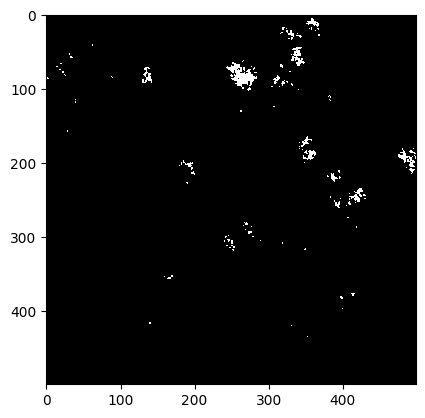

In [94]:
import pyclesperanto_prototype as cle
marker_binary = C4 > 230
## visualize the 3D images https://haesleinhuepf.github.io/BioImageAnalysisNotebooks/16_3d_image_visualization/inspecting_3d_images.html
another_slice = cle.create_2d_xy(marker_binary)
cle.copy_slice(marker_binary, another_slice, slice_index = 46)
# show result
cle.imshow(another_slice)

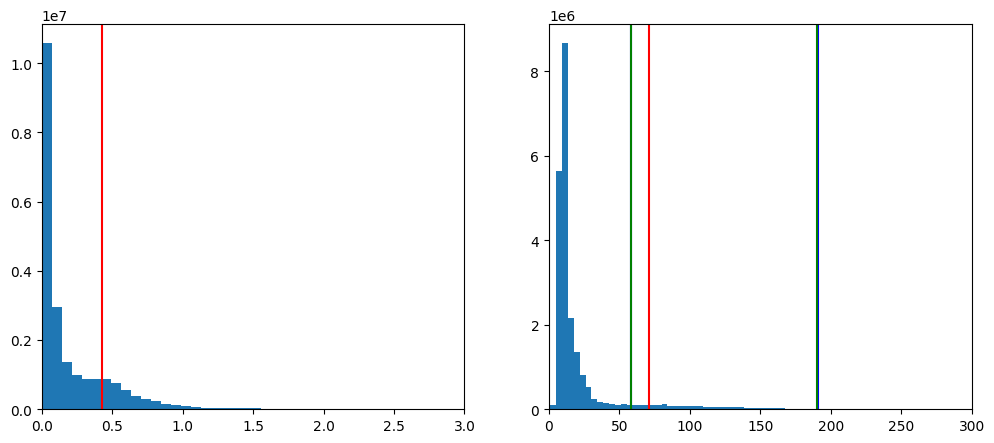

In [47]:
fig, axes = plt.subplots(ncols=2, figsize=(12, 5))
ax = axes.ravel()

ax[0].hist(C1.ravel(), bins=2000)
ax[0].set_xlim([0, 3])
ax[0].axvline(cutoff_foxa2, color='r')

ax[1].hist(C4.ravel(), bins=512)
ax[1].set_xlim([0, 300])
ax[1].axvline(cutoff_pax6, color='r')
ax[1].axvline(cutoff_marker2[0], color='b')
ax[1].axvline(cutoff_marker2[1], color='b')
ax[1].axvline(cutoff_marker3[0], color='g')
ax[1].axvline(cutoff_marker3[1], color='g')
ax[1].axvline(cutoff_marker3[2], color='g')

In [11]:
cutoff_pxko = threshold_otsu(C3)
cutoff_fako = threshold_otsu(C2)
cutoff_foxa2 = threshold_otsu(C1)
cutoff_pax6 = threshold_otsu(C4)
print(cutoff_pxko, cutoff_fako, cutoff_foxa2, cutoff_pax6)

2.0117477589503436 1.639835827808112 6.349190230918142 0.7701402889784946


In [7]:
import pandas as pd
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
from skimage import measure
from skimage.morphology import disk
from skimage.filters import threshold_otsu, rank
import pyclesperanto_prototype as cle
from skimage import filters
from skimage.filters import try_all_threshold
import napari_simpleitk_image_processing as nsitk

from skimage import measure

data = {"image": [], "cyst_index": [], "cyst_size": [], 
         "nb_fxko_global": [], "nb_pxko_global": [], "nb_foxa2_global": [], "nb_pax6_global": [],
         "cutoff_fxko_image": [],  "cutoff_pxko_image": [], "cutoff_foxa2_image": [], "cutoff_pax6_image": [],
        "nb_fxko_cyst": [], "nb_pxko_cyst": [], "nb_foxa2_cyst": [], "nb_pax6_cyst": [],
        "genotype_total": [],
        "fxko_nb_foxa2": [], "fxko_nb_pax6": [],  "pxko_nb_foxa2": [], "pxko_nb_pax6": [],
        "cutoff_fxko": [],  "cutoff_pxko": [],  "cutoff_foxa2": [],  "cutoff_pax6": [],
        "quantile95_fako_image": [], "quantile95_pxko_image": [], "quantile95_foxa2_image":[], "quantile95_pax6_image":[], 
        "quantile95_fako":[], "quantile95_pxko":[], "quantile95_foxa2":[], "quantile95_pax6":[]
       }
df = pd.DataFrame(data)
df

,image,cyst_index,cyst_size,nb_fxko_global,nb_pxko_global,nb_foxa2_global,nb_pax6_global,cutoff_fxko_image,cutoff_pxko_image,cutoff_foxa2_image,...,cutoff_foxa2,cutoff_pax6,quantile95_fako_image,quantile95_pxko_image,quantile95_foxa2_image,quantile95_pax6_image,quantile95_fako,quantile95_pxko,quantile95_foxa2,quantile95_pax6


In [8]:
for nm in os.listdir(imageDir):
    if "_C5_CystMask.tiff" in nm:
        #print(nm)
        fileName = nm.replace('_C5_CystMask.tiff','')
        #files += [nm]
        print(fileName)
        #make_composite_C5(newName, ImageDir, outDir)
        
        mask = imread(os.path.join(imageDir, str(fileName + "_C5_CystMask.tiff"))) # mask segmeted cysts
        C1 = imread(os.path.join(imageDir, str(fileName + "_C1.tif"))) # FoxA2, nuclei
        C2 = imread(os.path.join(imageDir, str(fileName + "_C2.tif"))) # FoxA2-KO genotype Scarlet, nuclei
        C3 = imread(os.path.join(imageDir, str(fileName + "_C3.tif"))) # Pax6-KO genotype 
        C4 = imread(os.path.join(imageDir, str(fileName + "_C4.tif"))) # Pax6, nuclei
        
        C1 = C1 / np.quantile(C1, 0.95)
        C2 = C2 / np.quantile(C2, 0.95)
        C3 = C3 / np.quantile(C3, 0.95)
        #C4 = C4 / np.quantile(C4, 0.95)
        
        labels_mask, nb_cyst = measure.label(mask, return_num = True)
        
        cutoff_fako_image = filters.threshold_otsu(C2)
        cutoff_pxko_image = filters.threshold_otsu(C3)
        cutoff_foxa2_image = filters.threshold_otsu(C1)
        #cutoff_pax6_image = filters.threshold_li(C4)
        if "Og2_" in fileName:
            cutoff_pax6_image = 200
        else:
            cutoff_pax6_image = filters.threshold_multiotsu(C4, classes=3, nbins = 512)[1]
        
        #cutoff_fako_image = threshold_otsu(C2)
        #cutoff_pxko_image = threshold_otsu(C3)
        #cutoff_foxa2_image = threshold_otsu(C1)
        #cutoff_pax6_image = threshold_otsu(C4)
        
        quantile95_fako_image = np.quantile(C2, 0.95)
        quantile95_pxko_image = np.quantile(C3, 0.95)
        quantile95_foxa2_image = np.quantile(C1, 0.95)
        quantile95_pax6_image = np.quantile(C4, 0.95)
        
        
        for i in range(nb_cyst+1):
            if i > 0:
                cyst_index = np.where(labels_mask == i)
                
                genotype_pxko = C3[cyst_index]
                genotype_fako = C2[cyst_index]
                foxa2 = C1[cyst_index]
                pax6 = C4[cyst_index]
                
                # counting using the image-based thresholds
                index_fako_global = np.where((genotype_fako > cutoff_fako_image) & (genotype_pxko < cutoff_pxko_image))
                index_pxko_global = np.where((genotype_pxko > cutoff_pxko_image) & (genotype_fako < cutoff_fako_image))
                
                index_foxa2_global = np.where(foxa2 > cutoff_foxa2_image)
                index_pax6_global = np.where(pax6 > cutoff_pax6_image)
                
                ## calculate the cyst-based thresholds
                #cutoff_fako = threshold_otsu(genotype_fako)
                #cutoff_pxko = threshold_otsu(genotype_pxko)
                #cutoff_foxa2 = threshold_otsu(foxa2)
                #cutoff_pax6 = threshold_otsu(pax6)
                
                cutoff_fako = filters.threshold_otsu(genotype_fako)
                cutoff_pxko = filters.threshold_otsu(genotype_pxko)
                cutoff_foxa2 = filters.threshold_otsu(foxa2)
                cutoff_pax6 = filters.threshold_otsu(pax6)
                
                index_foxa2_cyst = np.where(foxa2 > cutoff_foxa2)
                index_pax6_cyst = np.where(pax6 > cutoff_pax6)
                
                
                quantile95_fako = np.quantile(genotype_fako, 0.95)
                quantile95_pxko = np.quantile(genotype_pxko, 0.95)
                quantile95_foxa2 = np.quantile(foxa2, 0.95)
                quantile95_pax6 = np.quantile(pax6, 0.95)
                
                # count the foxa2+ and pax6+ voxels in the whole cyst
                index_fako_cyst = np.where((genotype_fako > cutoff_fako) & (genotype_pxko < cutoff_pxko))
                index_pxko_cyst = np.where((genotype_pxko > cutoff_pxko) & (genotype_fako < cutoff_fako))
                
                #index_foxa2_cyst = np.where(foxa2 > cutoff_foxa2)
                #index_pax6_cyst = np.where(pax6 > cutoff_pax6)
                #index_foxa2_cyst = np.where((foxa2 > cutoff_foxa2) & (pax6 < cutoff_pax6))
                #index_pax6_cyst = np.where((foxa2 < cutoff_foxa2) & (pax6 > cutoff_pax6))
                
                foxa2_fako = foxa2[index_fako_cyst]
                pax6_fako = pax6[index_fako_cyst]
                foxa2_pxko = foxa2[index_pxko_cyst]
                pax6_pxko = pax6[index_pxko_cyst]
                
                index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
                index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
                #index_foxa2_fako[0].size, index_pax6_fako[0].size
                
                index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
                index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
                #index_pax6_pxko[0].size, index_foxa2_pxko[0].size
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                
                genotype_total = index_fako_cyst[0].size + index_pxko_cyst[0].size
                
                #sels = np.where((genotype_pxko > cutoff_pxko) | (genotype_fako > cutoff_fako))
                #genotype_pxko_sels = genotype_pxko[sels]
                #genotype_fako_sels = genotype_fako[sels]
                #pax6_sels = pax6[sels]
                #foxa2_sels = foxa2[sels]
                
                # specify the FoxA2-KO and Pax6-KO genotype voxels 
                #index_pxko = np.where(genotype_pxko_sels > genotype_fako_sels)
                #index_fako = np.where(genotype_pxko_sels < genotype_fako_sels)
                #index_pxko[0].size/(index_pxko[0].size + index_fako[0].size)
                
                #foxa2_fako = foxa2_sels[index_fako]
                #pax6_fako = pax6_sels[index_fako]
                #index_foxa2_fako = np.where((foxa2_fako > cutoff_foxa2) & (pax6_fako < cutoff_pax6))
                #index_pax6_fako = np.where((foxa2_fako < cutoff_foxa2) & (pax6_fako > cutoff_pax6))
                #index_foxa2_fako[0].size, index_pax6_fako[0].size

                #foxa2_pxko = foxa2_sels[index_pxko]
                #pax6_pxko = pax6_sels[index_pxko]
                #index_foxa2_pxko = np.where((foxa2_pxko > cutoff_foxa2) & (pax6_pxko < cutoff_pax6))
                #index_pax6_pxko = np.where((foxa2_pxko < cutoff_foxa2) & (pax6_pxko > cutoff_pax6))
                #index_pax6_pxko[0].size, index_foxa2_pxko[0].size
                
                #print(index_foxa2_fako[0].size, index_pax6_pxko[0].size)
                
                #genotype_total = index_fako[0].size + index_pxko[0].size
                
                if (genotype_total) > 100:
                    df.loc[len(df)] = [fileName, i,  
                                        cyst_index[0].size,
                                        index_fako_global[0].size, index_pxko_global[0].size, index_foxa2_global[0].size, index_pax6_global[0].size,
                                        cutoff_fako_image, cutoff_pxko_image, cutoff_foxa2_image, cutoff_pax6_image,
                                        index_fako_cyst[0].size, index_pxko_cyst[0].size, 
                                        index_foxa2_cyst[0].size, index_pax6_cyst[0].size,
                                        genotype_total,
                                        index_foxa2_fako[0].size,  index_pax6_fako[0].size, 
                                        index_foxa2_pxko[0].size,  index_pax6_pxko[0].size, 
                                        cutoff_fako, cutoff_pxko, cutoff_foxa2, cutoff_pax6,
                                        quantile95_fako_image, quantile95_pxko_image, quantile95_foxa2_image, quantile95_pax6_image, 
                                        quantile95_fako, quantile95_pxko, quantile95_foxa2, quantile95_pax6
                                        
                                        ]
                                    

241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B10_324_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N61_B7_312_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B9_322_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B10_325_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B9_321_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N61_B8_316_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B10_326_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B9_320_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N61_B7_313_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N61_B7_314_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N61_B8_317_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N61_B8_318_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-Og2_B11_328_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-Og2_B11_329_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-Og2_B11_330_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-Og2_B12_332_01_isotropic
241023_10x_d6-2umZ_1-FS-PG_RA_FA2-Og2_B12_333_01_isotropic
241023

In [9]:
df

,image,cyst_index,cyst_size,nb_fxko_global,nb_pxko_global,nb_foxa2_global,nb_pax6_global,cutoff_fxko_image,cutoff_pxko_image,cutoff_foxa2_image,...,cutoff_foxa2,cutoff_pax6,quantile95_fako_image,quantile95_pxko_image,quantile95_foxa2_image,quantile95_pax6_image,quantile95_fako,quantile95_pxko,quantile95_foxa2,quantile95_pax6
0,241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B10_324_...,1,77876,1168,53203,19141,19550,1.230214,1.659220,3.108383,...,3.154468,100,1.0,1.0,1.0,88.0,1.057887,9.129676,6.628837,161.0
1,241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B10_324_...,2,27920,14680,0,0,4774,1.230214,1.659220,3.108383,...,0.488005,77,1.0,1.0,1.0,88.0,3.455861,0.095198,0.763721,119.0
2,241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B10_324_...,3,97228,1069,60832,32228,42934,1.230214,1.659220,3.108383,...,5.305610,141,1.0,1.0,1.0,88.0,0.898698,7.260979,10.825721,224.0
3,241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B10_324_...,4,27124,115,14998,13481,9729,1.230214,1.659220,3.108383,...,4.280947,110,1.0,1.0,1.0,88.0,0.138929,3.178252,8.427628,167.0
4,241023_10x_d6-2umZ_1-FS-PG_RA_FA2-N22_B10_324_...,5,22156,4919,3075,1335,2179,1.230214,1.659220,3.108383,...,2.065972,78,1.0,1.0,1.0,88.0,1.858177,2.543063,3.392791,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Og2_B6_310...,47,2336,1273,0,2137,0,1.077256,3.941952,0.347410,...,0.539604,74,1.0,1.0,1.0,113.0,2.796990,0.044043,0.783217,115.0
1491,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Og2_B6_310...,49,57414,32691,789,57372,488,1.077256,3.941952,0.347410,...,0.919348,104,1.0,1.0,1.0,113.0,2.694567,3.141255,1.347319,175.0
1492,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Og2_B6_310...,51,768,521,0,768,12,1.077256,3.941952,0.347410,...,0.863750,112,1.0,1.0,1.0,113.0,3.569604,0.027038,1.109557,183.0
1493,241023_10x_d6-2umZ_1-FS-PG_noRA_FA2-Og2_B6_310...,52,1860,385,0,1860,0,1.077256,3.941952,0.347410,...,0.750091,82,1.0,1.0,1.0,113.0,1.387739,3.327883,0.897436,106.0


In [10]:
df.to_csv(os.path.join(outDir, "cyst_size_genotype_FoxA2_markers_genotype_FoxA_ostu_markerMultiotsu_manualOlig2global_v2.csv"), index=True, header=True)